<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana13/Neurona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
sigm = lambda x: 1/(1+np.exp(-x))

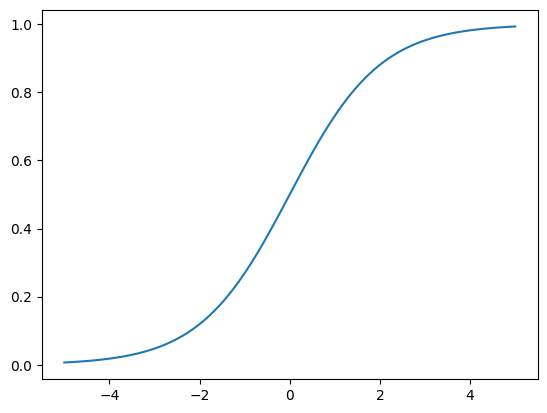

In [3]:
x = np.linspace(-5,5,100)
y = sigm(x)
plt.plot(x,y)

In [48]:
class Layers:

  def __init__(self, NC, NN, ActFunc, rate= 0.1):

    self.NC = NC
    self.NN = NN
    self.ActFun = ActFunc
    self.rate = rate

    self.W = np.random.uniform(-10,10,size=(self.NC,self.NN))
    self.b = np.random.uniform(-10,10,size=(1,self.NN))

  def Activation(self,x):
    z = np.dot(x,self.W) + self.b
    return self.ActFun(z)[0]

  def Mutate(self):
    self.W += np.random.normal(loc=0,scale=self.rate,size=(self.NC,self.NN))
    self.b += np.random.normal(loc=0,scale=self.rate,size=(1,self.NN))



In [49]:
l0 = Layers(2,3,sigm)
l0

In [50]:
l0.W

array([[ 0.64292213, -2.91897407,  9.37181602],
       [ 1.55579259, -8.71765377, -6.79789304]])

In [51]:
l0.b

array([[ 4.13878244, -5.07219895,  7.62554822]])

In [52]:
l0.Mutate()

In [53]:
l0.W

array([[ 0.64774096, -2.78480115,  9.29160717],
       [ 1.580063  , -8.76364839, -6.73205195]])

In [74]:
def GetBrain():
  l0 = Layers(1,4,sigm)
  l1 = Layers(4,2,sigm)

  return [l0,l1]

In [75]:
Brain = GetBrain()
Brain

[<__main__.Layers at 0x7e1aee8f8110>, <__main__.Layers at 0x7e1aedbd1c10>]

In [76]:
def BrainActivation(Brain,x):

  for i in range(len(Brain)):
    if i == 0:
      output =  Brain[i].Activation(x)
    else:
      output = Brain[i].Activation(output)

  return output

In [78]:
BrainActivation(GetBrain(),np.array([1]))

array([9.99999362e-01, 1.14262392e-04])

In [79]:
def BrainMutate(Brain):
  for i in range(len(Brain)):
    Brain[i].Mutate()
  return Brain

In [83]:
def GetPlot():

  fig = plt.figure(figsize=(8,5))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  return ax1,ax2

  return fig,ax1,ax2

(<Axes: >, <Axes: >)

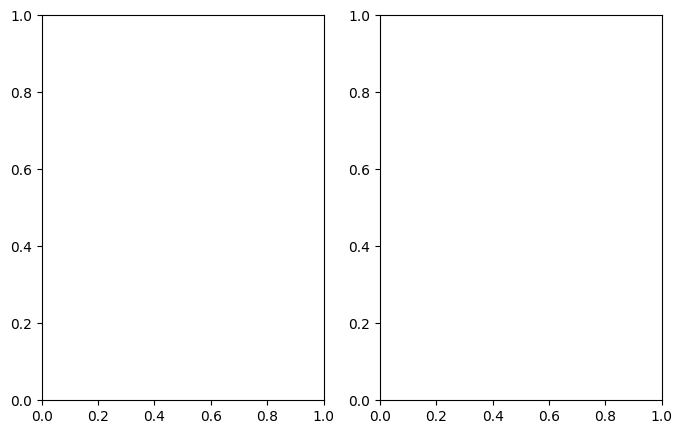

In [84]:
GetPlot()

In [90]:
def Genetic(Brain,epochs=50):

  n = 20
  x = np.linspace(-1,1,n)
  y = np.linspace(-1,1,n)
  X,Y = np.meshgrid(x,y)
  N = np.zeros((2,5))

  for e in range(epochs):

    clear_output(wait=True)
    print(f'Epoch: {e}')

    Brain = BrainMutate(Brain)

    x = np.linspace(0,2,5)
    y = np.zeros((5,2))
    y[0,:] = np.array([1,0])
    y[1,:] = np.array([0,1])
    y[2,:] = np.array([1,0])
    y[3,:] = np.array([0,1])
    y[4,:] = np.array([1,0])

    for i in range(5):
      N[0,i] = BrainActivation(Brain,np.array([x[i]]))[0]
      N[1,i] = BrainActivation(Brain,np.array([x[i]]))[1]

    #for i in range(n):
    #  for j in range(n):
    #    N[0,i,j] = BrainActivation(Brain,np.array([x[i],y[j]]))[0]
    #    N[1,i,j] = BrainActivation(Brain,np.array([x[i],y[j]]))[1]

    ax1,ax2 = GetPlot()
    ax1.plot(x,N[0,:])
    ax1.plot(x,N[1,:])
    #ax1.plot_surface(X,Y,N[0,:,:],cmap='viridis')
    #ax2.plot_surface(X,Y,N[1,:,:],cmap='viridis')
    plt.show()
    time.sleep(0.1)

Epoch: 49


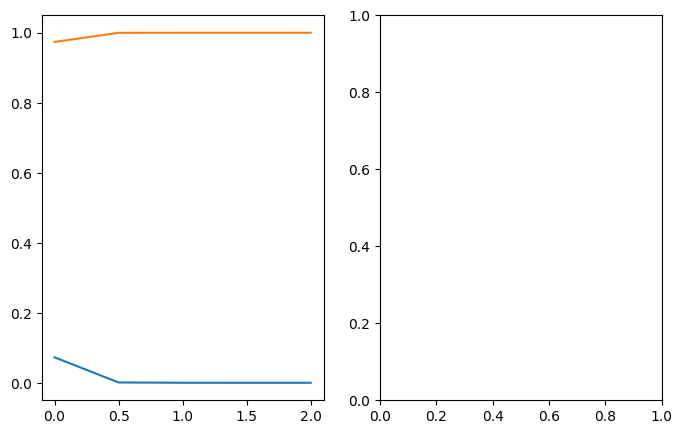

In [91]:
Genetic(Brain)